In [1]:
import os
import json

os.chdir(os.path.join(os.getcwd(), '..'))

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
with open(os.path.join(os.getcwd(), 'data', 'fairprice', 'fairprice_rj1smA.json'), 'r') as f:
#     data = json.load(f)
    df = pd.read_json(f, orient='index')

In [5]:
len(df)

6516

In [4]:
df.head()

,ADDITIONAL INFORMATION,COUNTRY OF ORIGIN,Category,DIETARY,DISCLAIMER,INGREDIENTS,Key Info,NUTRITION FACTS,Original_Price,PREPARATION,Product_url,STORAGE,Selling_Price,Title,Weight_Volume
5b7bcb216e2054199fec374d,We begin with honest ingredients like farm gro...,USA,Baking & Cooking,NaN,NaN,"Tomato Puree (Water, Tomato Paste), Potatoes, ...",0,Attributes\nPer Serving (120ml)\n\n\nCalories\...,1.95,"Heat, covered, in microwavable bowl on high 3 ...",https://www.fairprice.com.sg/product/campbells...,NaN,1.85,Campbell's Condensed Soup - Vegetable,298g
5b7bcb246e2054199fec374e,NaN,Egypt,Fresh Produce,NaN,NaN,NaN,These Grapes are round or oval-shaped with smo...,NaN,3.95,Option 1: Slice Grapes in half and add them to...,https://www.fairprice.com.sg/product/egypt-red...,NaN,3.95,Egypt Red Seedless Grapes,500g
5b7bcb276e2054199fec374f,NaN,Malaysia,Fresh Produce,NaN,NaN,NaN,0,NaN,3.95,NaN,https://www.fairprice.com.sg/product/pasar-hol...,NaN,3.95,Pasar Holland Swiss Brown Mushroom,200g
5b7bcb296e2054199fec3750,NaN,Thailand,Home Care,NaN,NaN,NaN,P P bristles,NaN,2.30,NaN,https://www.fairprice.com.sg/product/kiwi-shoe...,NaN,2.30,Kiwi Shoe Brush,1 per pack
5b7bcb2c6e2054199fec3751,NaN,Malaysia,Health & Beauty,NaN,NaN,"Essence of Chicken, American Ginseng Extract",[ A highly stressful lifestyle – from work or ...,Attributes\nPer Serving (100g)\n\n\nEnergy\n0k...,19.90,It can be consumed directly from the bottle at...,https://www.fairprice.com.sg/product/new-moon-...,Keep refrigerated after opening and consume wi...,17.90,New Moon Essence of Chicken -American Ginseng,6 x 68ml + free 2 x 68ml


In [6]:
category_df = df.groupby(['Category']).mean()

In [7]:
category_df.sort_values(['Selling_Price'], ascending=False, inplace=True)
cums = []
cum =0
tot = sum(category_df.Selling_Price)
for i in category_df.Selling_Price:
    cum +=i
    cums.append(cum/tot *100)

In [8]:
category_df['cums'] = cums

In [9]:
rank = []
for cum in cums:
    if cum < 75:
        rank.append('A')
    elif cum <95:
        rank.append('B')
    else:
        rank.append('C')
category_df['rank'] = rank
category_df

,Original_Price,Selling_Price,cums,rank
Category,,,,
Baby & Child,32.983019,30.713585,16.426902,A
Deals & Promotions,25.905014,23.737106,29.122493,A
"Beer, Wine & Spirits",25.130935,23.708505,41.802788,A
NA,26.428125,22.781250,53.987147,A
Home & Living,14.386012,13.832143,61.385152,A
Tesco,14.349716,13.761648,68.745454,A
Health & Beauty,13.806799,12.617738,75.493945,B
Frozen,7.486564,7.186274,79.337463,B
Home Care,6.618765,6.307997,82.711242,B


In [28]:
x = list(np.linspace(0,100,len(category_df['Selling_Price']) + 1))
x.remove(0)
y = category_df.cums

In [29]:
category_df['Inventory'] = x
category_df

,Original_Price,Selling_Price,cums,rank,Inventory
Category,,,,,
Baby & Child,32.983019,30.713585,16.426902,A,6.25
Deals & Promotions,25.905014,23.737106,29.122493,A,12.50
"Beer, Wine & Spirits",25.130935,23.708505,41.802788,A,18.75
NA,26.428125,22.781250,53.987147,A,25.00
Home & Living,14.386012,13.832143,61.385152,A,31.25
Tesco,14.349716,13.761648,68.745454,A,37.50
Health & Beauty,13.806799,12.617738,75.493945,B,43.75
Frozen,7.486564,7.186274,79.337463,B,50.00
Home Care,6.618765,6.307997,82.711242,B,56.25


/home/dh/.local/lib/python3.7/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/home/dh/.local/lib/python3.7/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


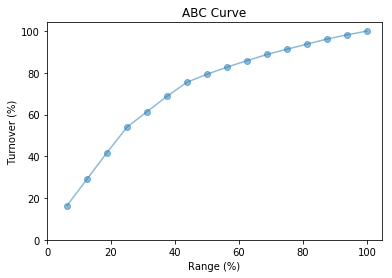

In [32]:
plt.plot(x,y,'o-', alpha=0.5)
plt.xlim(xmin = 0)
plt.ylim(ymin = 0)
plt.xlabel('Range (%)')
plt.ylabel('Turnover (%)')
plt.title('ABC Curve')
plt.show()